In [1]:
%matplotlib inline
import pandas as pd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('bright')
plt.style.use('ggplot')
import statsmodels.formula.api as smf
from nipype.interfaces.afni.preprocess import TCorr1D

In [2]:
# the melodic output giving each ICA timeseries
ica_ts = pd.read_csv('./data/test_bold_MELODICmix.tsv', sep='\t', header=None)
ica_ts.dropna(axis='columns', how='all', inplace=True)
ica_ts


,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.758030,-1.186418,0.790879,-2.197487,1.143364,0.027185,-0.401727,-0.266738,-0.899754,2.957095,...,0.202970,-0.757285,0.580424,-2.170545,1.135138,1.185032,0.161144,-1.449952,-0.340129,3.207329
1,0.855021,1.225001,2.436515,-0.110996,-1.360332,-0.645831,0.705279,-0.529328,-0.961012,3.887399,...,-1.151278,-1.355444,0.157133,-1.456655,-1.614684,-0.420475,2.215335,-0.568601,-1.310884,-0.647429
2,-1.378687,-1.099753,0.282676,-1.600301,-0.390527,-0.477530,-0.573430,-0.526413,-1.896047,2.362592,...,-0.269990,0.657094,0.669171,-0.859728,0.482538,1.614340,-0.225722,-1.383938,1.844453,1.692464
3,3.310646,1.226795,2.549461,0.782276,-0.979568,0.248360,0.926625,-0.615597,-1.456201,3.235565,...,-0.873392,0.517578,0.564591,-1.450724,-1.293111,-1.069044,1.296962,-1.100991,1.450045,-0.018287
4,-1.753966,-1.724009,-0.885913,-2.228024,0.471514,-0.653573,-1.937831,-0.583467,-1.993739,1.610389,...,-0.965310,-0.250692,1.413558,-0.252963,1.918096,1.726810,-0.392606,-1.935342,2.626670,1.386460
5,1.780780,1.396567,2.651731,0.844989,0.575128,2.821088,0.802298,-0.488723,-1.243223,2.658086,...,0.777045,0.005217,0.465596,-3.730736,-2.186454,-0.704023,0.493640,-3.611454,1.969827,0.661729
6,0.896910,-0.046999,2.654106,-0.119107,-1.018090,-1.541254,-0.947329,-0.708264,-1.860775,3.528266,...,0.135672,-0.520319,0.393585,-0.779031,-1.871363,-1.594673,2.487526,-0.937229,-0.518867,-0.899052
7,-0.369932,-1.787484,0.620003,-1.511211,-0.356180,0.641910,-0.446017,-0.097107,-1.537378,2.775697,...,1.606755,0.737180,1.830311,-0.913558,0.384678,0.887486,-0.083513,1.342078,3.182464,1.492853
8,2.128684,0.817207,3.237473,1.374350,-1.158240,1.478642,0.541205,-0.680647,-1.143305,2.300144,...,1.580861,-0.048126,1.016014,-2.094144,-2.007339,-2.108548,1.646053,-0.253534,0.482054,-0.859657
9,-1.509648,-2.096493,-0.501824,-2.258141,0.248414,-1.024184,-2.066380,-0.612480,-2.288913,1.098900,...,1.281701,1.177572,1.449433,-0.318571,0.561361,0.055916,-0.325411,-1.602622,1.129909,1.040871


In [3]:
# load the noise indices
ica_noise_idx = np.loadtxt('./data/test_bold_AROMAnoiseICs.csv', delimiter=',', dtype='int')
ica_noise_idx -= 1
ica_noise_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35,
       36, 37, 38, 39, 41, 42, 43, 44, 48, 49, 50, 52, 53, 56, 58, 59, 60,
       61, 62, 64, 65, 66, 67, 69, 70, 72])

In [4]:
signal_noise_idx = np.full(len(ica_ts.columns), 'signal')
signal_noise_idx[ica_noise_idx] = 'noise'
signal_noise_idx


array(['noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise',
       'noise', 'signal', 'noise', 'noise', 'noise', 'noise', 'noise',
       'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise',
       'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise',
       'noise', 'noise', 'noise', 'signal', 'noise', 'noise', 'noise',
       'noise', 'noise', 'noise', 'noise', 'noise', 'signal', 'noise',
       'noise', 'noise', 'noise', 'signal', 'signal', 'signal', 'noise',
       'noise', 'noise', 'signal', 'noise', 'noise', 'signal', 'signal',
       'noise', 'signal', 'noise', 'noise', 'noise', 'noise', 'noise',
       'signal', 'noise', 'noise', 'noise', 'noise', 'signal', 'noise',
       'noise', 'signal', 'noise'], dtype='<U6')

In [5]:
color_idx = np.array([st.replace('noise', 'red').replace('signal', 'green') for st in signal_noise_idx])
color_idx

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'green', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'green', 'red', 'red', 'red', 'red',
       'green', 'green', 'green', 'red', 'red', 'red', 'green', 'red',
       'red', 'green', 'green', 'red', 'green', 'red', 'red', 'red',
       'red', 'red', 'green', 'red', 'red', 'red', 'red', 'green', 'red',
       'red', 'green', 'red'], dtype='<U5')

In [6]:
# the confounds tsv
confounds = pd.read_csv('./data/test_bold_confounds.tsv', sep='\t')
confounds

,CSF,WhiteMatter,GlobalSignal,stdDVARS,non-stdDVARS,vx-wisestdDVARS,FramewiseDisplacement,tCompCor00,tCompCor01,tCompCor02,...,AROMAAggrComp61,AROMAAggrComp62,AROMAAggrComp63,AROMAAggrComp65,AROMAAggrComp66,AROMAAggrComp67,AROMAAggrComp68,AROMAAggrComp70,AROMAAggrComp71,AROMAAggrComp73
0,4.826616,0.244417,2.084664,NaN,NaN,NaN,NaN,0.056869,-0.006587,-0.105907,...,1.977688,-0.869653,-1.181006,-0.757285,0.580424,-2.170545,1.135138,0.161144,-1.449952,3.207329
1,-1.675956,0.401133,0.607724,1.245240,10.564131,1.052146,0.619482,-0.001804,0.011459,-0.078431,...,0.173481,-0.326303,-0.542473,-1.355444,0.157133,-1.456655,-1.614684,2.215335,-0.568601,-0.647429
2,1.086976,0.593310,1.711596,1.329685,11.280532,1.202394,0.376306,0.035729,-0.029645,0.066901,...,1.663285,-1.108394,-2.723212,0.657094,0.669171,-0.859728,0.482538,-0.225722,-1.383938,1.692464
3,-0.268196,0.270533,0.871375,1.173665,9.956918,1.019827,0.207354,-0.000183,0.035827,-0.071468,...,-0.443019,1.377220,-0.745638,0.517578,0.564591,-1.450724,-1.293111,1.296962,-1.100991,-0.018287
4,1.103928,0.219790,1.583645,1.300516,11.033072,1.109406,0.497735,0.077244,-0.001720,-0.012880,...,1.480062,-2.249758,-1.405533,-0.250692,1.413558,-0.252963,1.918096,-0.392606,-1.935342,1.386460
5,0.730507,-0.491903,0.144364,1.340298,11.370564,1.167815,0.384280,-0.004946,0.047539,0.013124,...,0.696395,2.933469,1.654199,0.005217,0.465596,-3.730736,-2.186454,0.493640,-3.611454,0.661729
6,0.014618,-0.911908,-0.759333,1.159769,9.839031,1.006613,0.781297,-0.057035,0.016294,-0.073487,...,1.330019,1.971868,1.289999,-0.520319,0.393585,-0.779031,-1.871363,2.487526,-0.937229,-0.899052
7,3.783103,0.442317,2.370601,1.455348,12.346606,1.254484,0.733416,0.092287,0.053989,0.104451,...,1.547773,-2.359954,-0.296581,0.737180,1.830311,-0.913558,0.384678,-0.083513,1.342078,1.492853
8,1.415054,-0.423917,0.521469,1.343367,11.396601,1.160523,0.451921,-0.001076,0.050963,-0.029119,...,0.645627,0.514537,-1.051481,-0.048126,1.016014,-2.094144,-2.007339,1.646053,-0.253534,-0.859657
9,2.256537,0.284312,1.381078,1.196938,10.154355,1.053303,0.297836,0.050196,0.034873,-0.004992,...,0.379265,-0.851301,-2.414102,1.177572,1.449433,-0.318571,0.561361,-0.325411,-1.602622,1.040871


In [7]:
correlations = np.corrcoef(ica_ts, rowvar=False)

Text(0.5,1,'Correlation of ICA Components')

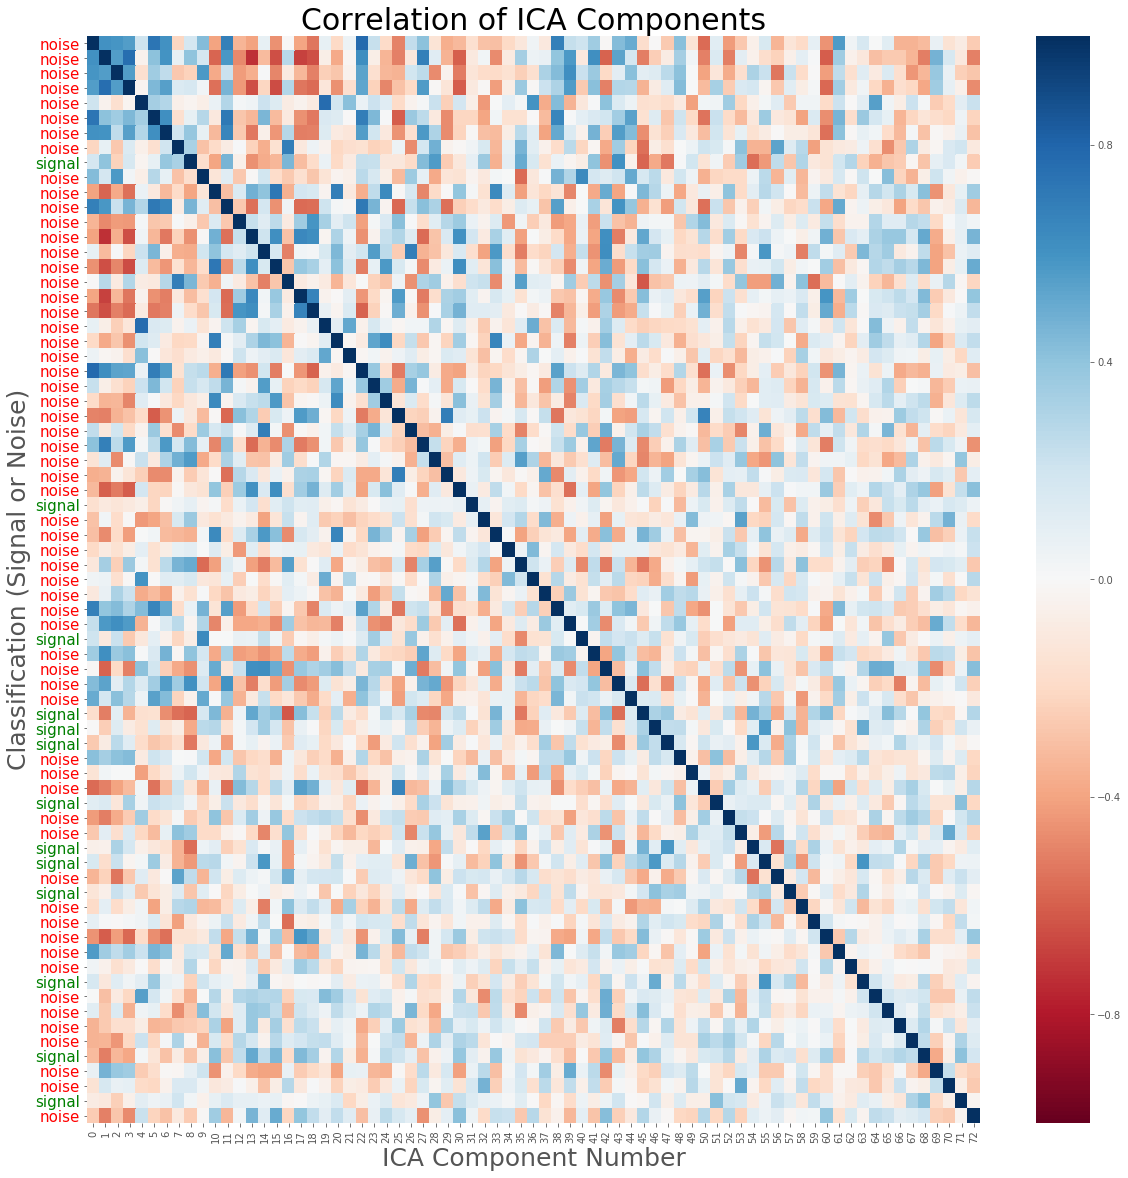

In [8]:
# make the figure bigger overall
plt.rcParams["figure.figsize"] = (20,20)
fig = sns.heatmap(correlations, 
                  yticklabels=signal_noise_idx, #label the yaxis with individual markers
                  vmin=-1, vmax=1, # set the colorbar to go from -1 to 1
                  cmap="RdBu") # have the color gradient go from red to blue
for color,tick in zip(color_idx, fig.yaxis.get_major_ticks()):
    tick.label1.set_color(color) # set the individual colors
    tick.label1.set_fontsize('15') # increase the size
fig.set_ylabel('Classification (Signal or Noise)', fontdict={'fontsize': 25})
fig.set_xlabel('ICA Component Number', fontdict={'fontsize': 25})
fig.set_title('Correlation of ICA Components', fontdict={'fontsize': 30})

In [9]:
# Component 47 (e.g. indexed 46) looks like fronto-parietal network
# ica_ts[46]
aroma_confounds = confounds.filter(regex='AROMA.*')
aroma_confounds.insert(0, 'fronto_parietal', ica_ts[46])
aroma_confounds

,fronto_parietal,AROMAAggrComp01,AROMAAggrComp02,AROMAAggrComp03,AROMAAggrComp04,AROMAAggrComp05,AROMAAggrComp06,AROMAAggrComp07,AROMAAggrComp08,AROMAAggrComp10,...,AROMAAggrComp61,AROMAAggrComp62,AROMAAggrComp63,AROMAAggrComp65,AROMAAggrComp66,AROMAAggrComp67,AROMAAggrComp68,AROMAAggrComp70,AROMAAggrComp71,AROMAAggrComp73
0,-0.336488,-0.758030,-1.186418,0.790879,-2.197487,1.143364,0.027185,-0.401727,-0.266738,2.957095,...,1.977688,-0.869653,-1.181006,-0.757285,0.580424,-2.170545,1.135138,0.161144,-1.449952,3.207329
1,0.320439,0.855021,1.225001,2.436515,-0.110996,-1.360332,-0.645831,0.705279,-0.529328,3.887399,...,0.173481,-0.326303,-0.542473,-1.355444,0.157133,-1.456655,-1.614684,2.215335,-0.568601,-0.647429
2,2.136563,-1.378687,-1.099753,0.282676,-1.600301,-0.390527,-0.477530,-0.573430,-0.526413,2.362592,...,1.663285,-1.108394,-2.723212,0.657094,0.669171,-0.859728,0.482538,-0.225722,-1.383938,1.692464
3,2.563796,3.310646,1.226795,2.549461,0.782276,-0.979568,0.248360,0.926625,-0.615597,3.235565,...,-0.443019,1.377220,-0.745638,0.517578,0.564591,-1.450724,-1.293111,1.296962,-1.100991,-0.018287
4,1.875652,-1.753966,-1.724009,-0.885913,-2.228024,0.471514,-0.653573,-1.937831,-0.583467,1.610389,...,1.480062,-2.249758,-1.405533,-0.250692,1.413558,-0.252963,1.918096,-0.392606,-1.935342,1.386460
5,0.964201,1.780780,1.396567,2.651731,0.844989,0.575128,2.821088,0.802298,-0.488723,2.658086,...,0.696395,2.933469,1.654199,0.005217,0.465596,-3.730736,-2.186454,0.493640,-3.611454,0.661729
6,1.515538,0.896910,-0.046999,2.654106,-0.119107,-1.018090,-1.541254,-0.947329,-0.708264,3.528266,...,1.330019,1.971868,1.289999,-0.520319,0.393585,-0.779031,-1.871363,2.487526,-0.937229,-0.899052
7,1.929736,-0.369932,-1.787484,0.620003,-1.511211,-0.356180,0.641910,-0.446017,-0.097107,2.775697,...,1.547773,-2.359954,-0.296581,0.737180,1.830311,-0.913558,0.384678,-0.083513,1.342078,1.492853
8,1.256470,2.128684,0.817207,3.237473,1.374350,-1.158240,1.478642,0.541205,-0.680647,2.300144,...,0.645627,0.514537,-1.051481,-0.048126,1.016014,-2.094144,-2.007339,1.646053,-0.253534,-0.859657
9,2.234215,-1.509648,-2.096493,-0.501824,-2.258141,0.248414,-1.024184,-2.066380,-0.612480,1.098900,...,0.379265,-0.851301,-2.414102,1.177572,1.449433,-0.318571,0.561361,-0.325411,-1.602622,1.040871


Text(0.5,0,'Time (Seconds)')

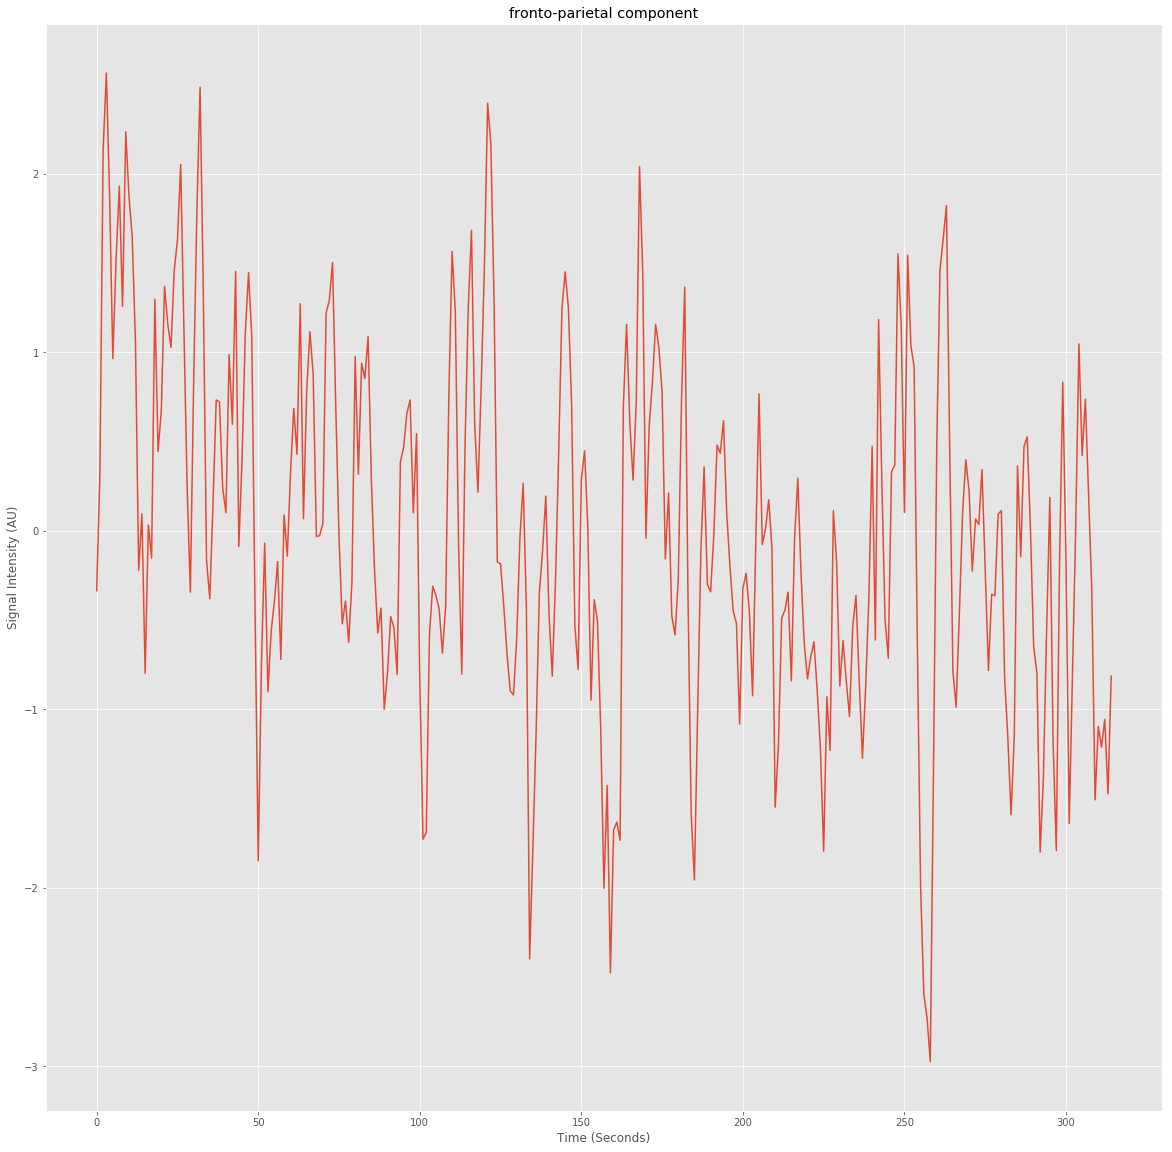

In [10]:
# get the frequency spectra of the signal component
plt.plot(aroma_confounds['fronto_parietal'])
plt.title('fronto-parietal component')
plt.ylabel('Signal Intensity (AU)')
plt.xlabel('Time (Seconds)')

In [11]:
# statsmodels
# change this to a voxel of interest
column_names = aroma_confounds.columns.tolist()
column_names.remove('fronto_parietal')
all_columns = "+".join(column_names)

model = smf.ols('fronto_parietal ~ ' + all_columns, data=aroma_confounds)

In [12]:
fit = model.fit()

Text(0.5,0,'Time (Seconds)')

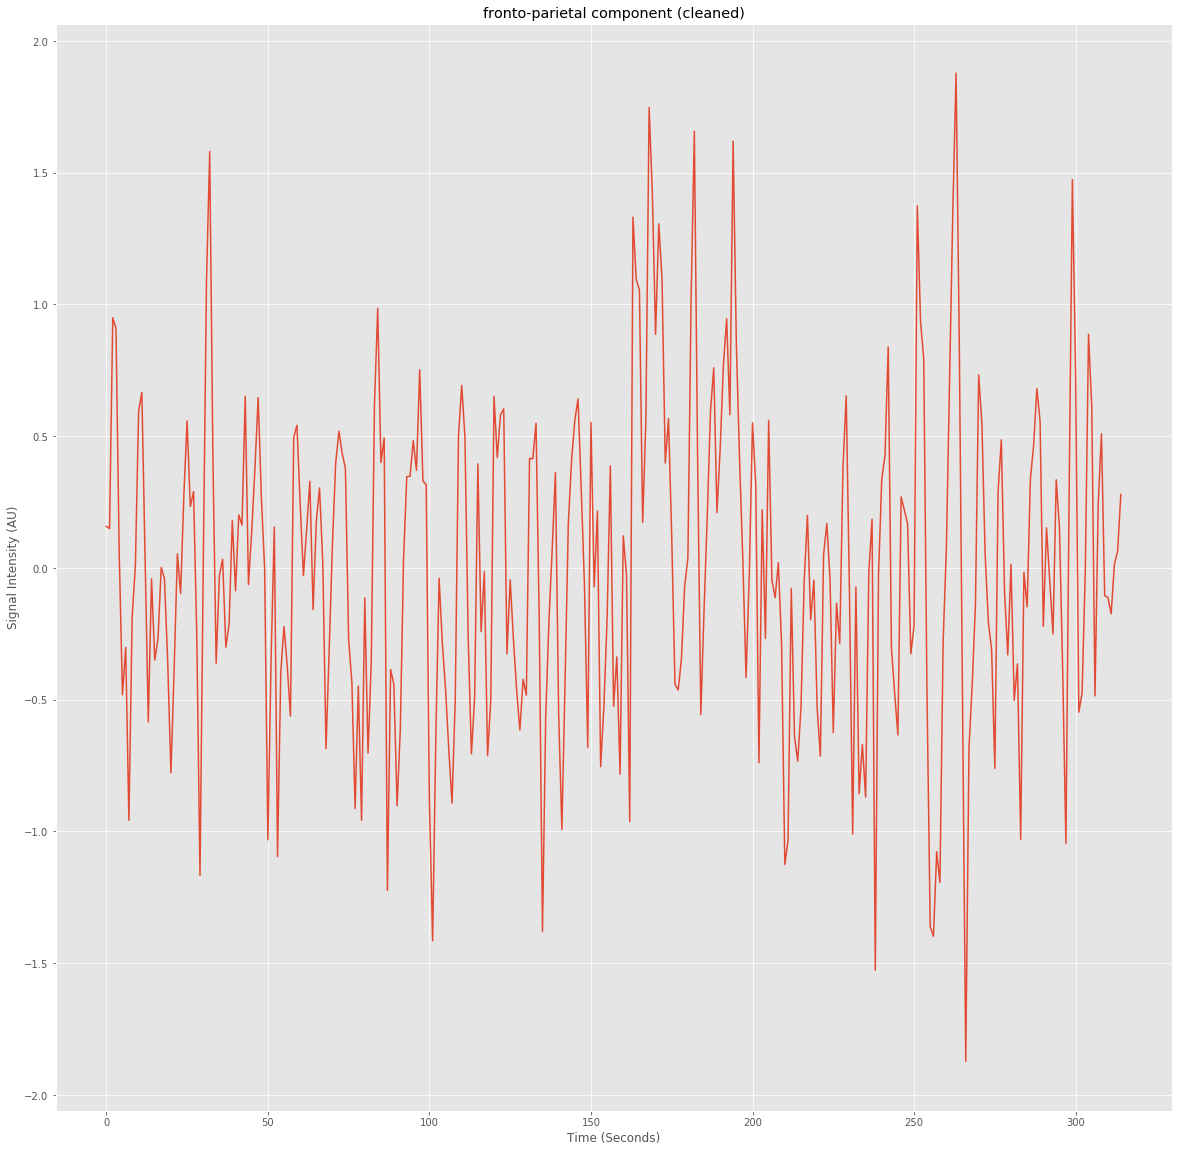

In [13]:
plt.plot(fit.resid)
plt.title('fronto-parietal component (cleaned)')
plt.ylabel('Signal Intensity (AU)')
plt.xlabel('Time (Seconds)')

In [14]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fronto_parietal   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     6.982
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           6.35e-29
Time:                        12:30:52   Log-Likelihood:                -293.01
No. Observations:                 315   AIC:                             708.0
Df Residuals:                     254   BIC:                             936.9
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.195e-12      0.038   -8.3e-11      1.000      -0.076       0.076
AROMAAggrComp01    -0.1371      0.126     -1.086      0.278      -0.386       0.111
AROMAAggrComp02    -0.1064      0.166     -0.642      0.521      -0.433       0.220
AROMAAggrComp03     0.0968      0.119      0.811      0.418      -0.138       0.332
AROMAAggrComp04     0.0448      0.126      0.355      0.723      -0.203       0.293
AROMAAggrComp05    -0.0052      0.116     -0.045      0.964      -0.234       0.224
AROMAAggrComp06     0.1690      0.106      1.588      0.114      -0.041       0.379
AROMAAggrComp07     0.2291      0.100      2.301      0.022       0.033       0.425
AROMAAggrComp08     0.1303      0.093      1.393      0.165      -0.054       0.314
AROMAAggrComp10     0.2559      0.095      2.694      0.008       0.069       0.443
AROMAAggrComp11     0.1306      0.103      1.270      0.205      -0.072       0.333
AROMAAggrComp12    -0.0966      0.114     -0.844      0.399      -0.322       0.129
AROMAAggrComp13     0.0127      0.088      0.145      0.885      -0.160       0.186
AROMAAggrComp14    -0.1015      0.102     -0.997      0.320      -0.302       0.099
AROMAAggrComp15     0.0287      0.107      0.268      0.789      -0.182       0.239
AROMAAggrComp16     0.1190      0.099      1.204      0.230      -0.076       0.314
AROMAAggrComp17    -0.2505      0.091     -2.739      0.007      -0.431      -0.070
AROMAAggrComp18     0.0066      0.091      0.072      0.942      -0.173       0.186
AROMAAggrComp19    -0.0766      0.100     -0.762      0.447      -0.274       0.121
AROMAAggrComp20     0.1299      0.104      1.245      0.214      -0.076       0.336
AROMAAggrComp21    -0.0109      0.087     -0.126      0.900      -0.182       0.160
AROMAAggrComp22    -0.1476      0.078     -1.900      0.059      -0.301       0.005
AROMAAggrComp23    -0.1324      0.096     -1.378      0.169      -0.322       0.057
AROMAAggrComp24    -0.1284      0.095     -1.346      0.180      -0.316       0.059
AROMAAggrComp25    -0.0979      0.076     -1.280      0.202      -0.248       0.053
AROMAAggrComp26     0.0996      0.090      1.102      0.272      -0.078       0.278
AROMAAggrComp27    -0.0569      0.089     -0.642      0.521      -0.231       0.117
AROMAAggrComp28    -0.1515      0.083     -1.821      0.070      -0.315       0.012
AROMAAggrComp29    -0.0190      0.093     -0.204      0.839      -0.203       0.165
AROMAAggrComp30    -0.0223      0.086     -0.260      0.795      -0.191       0.146
AROMAAggrComp31     0.0901      0.076      1.189      0.236      -0.059       0.239
AROMAAggrComp33     0.0475      0.091      0.523      0.601      -0.132       0.227
AROMAAggrComp34     0.1584      0.086      1.838      0.067      -0.011       0.328
AROMAAggrComp35     0.1202      0.077      1.560      0.120

In [18]:
# write two text files for analysis
fit.resid.to_csv('./data/fronto_parietal-resid.txt', index=False)
aroma_confounds['fronto_parietal'].to_csv('./data/fronto_parietal-orig.txt', index=False)

In [28]:

afni_corr_objs = {}
for signal in ['orig', 'resid']:
    afni_corr = TCorr1D(xset='./data/test_bold_space-MNI152NLin2009cAsym_preproc.nii.gz',
                        y_1d='./data/fronto_parietal-{sig}.txt'.format(sig=signal),
                        args='-mask ./data/test_bold_space-MNI152NLin2009cAsym_brainmask.nii.gz',
                        out_file='./data/fronto_parietal-{sig}_corr.nii.gz'.format(sig=signal))
    res = afni_corr.run()
    afni_corr_objs[signal] = res.outputs.out_file


180921-12:51:10,847 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.847059:++ 3dTcorr1D: AFNI version=Debian-16.2.07~dfsg.1-5~nd16.04+1 (Jun 12 2017) [64-bit]
180921-12:51:10,852 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.852831:++ Number of voxels in mask = 41797
180921-12:51:10,853 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.852831: + reading dataset file ./data/test_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
180921-12:51:10,857 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.857677:** AFNI converts NIFTI_datatype=4 (INT16) in file ./data/test_bold_space-MNI152NLin2009cAsym_preproc.nii.gz to FLOAT32
180921-12:51:10,858 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.857677:     Warnings of this type will be muted for this session.
180921-12:51:10,860 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.857677:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
180921-12:51:10,861 nipype.interface INFO:
	 stderr 2018-09-21T12:51:10.8576

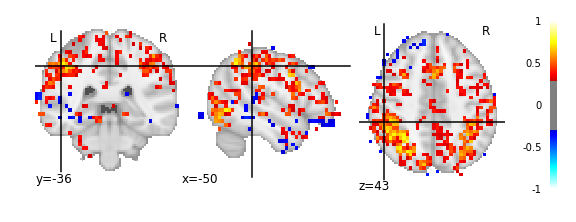

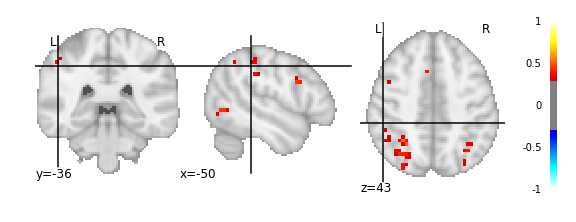

In [35]:
from nilearn.plotting import plot_stat_map
for signal, stat in afni_corr_objs.items():
    plot_stat_map(stat, threshold=0.3, cut_coords=[-50, -36, 43], vmax=1.0)


In [29]:
afni_corr_objs

{'orig': '/media/Data/Documents/devel/2018-Seminar-Talk/data/fronto_parietal-orig_corr.nii.gz',
 'resid': '/media/Data/Documents/devel/2018-Seminar-Talk/data/fronto_parietal-resid_corr.nii.gz'}

In [ ]:
# bold_image = nib.load('./data/test_bold_space-MNI152NLin2009cAsym_preproc.nii.gz')
# mask_image = nib.load('./data/test_bold_space-MNI152NLin2009cAsym_brainmask.nii.gz')

In [ ]:
# bold_data = bold_image.get_data()
# bold_data_2d = bold_data.reshape(np.prod(bold_data.shape[:-1]), bold_data.shape[-1])

In [ ]:
# mask_data = mask_image.get_data()
# mask_data = mask_data.astype(bool)


In [ ]:
# bold_data_masked = bold_data[mask_data]
# bold_data_masked.shape

In [ ]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='correlation')


## Dummy ICA example

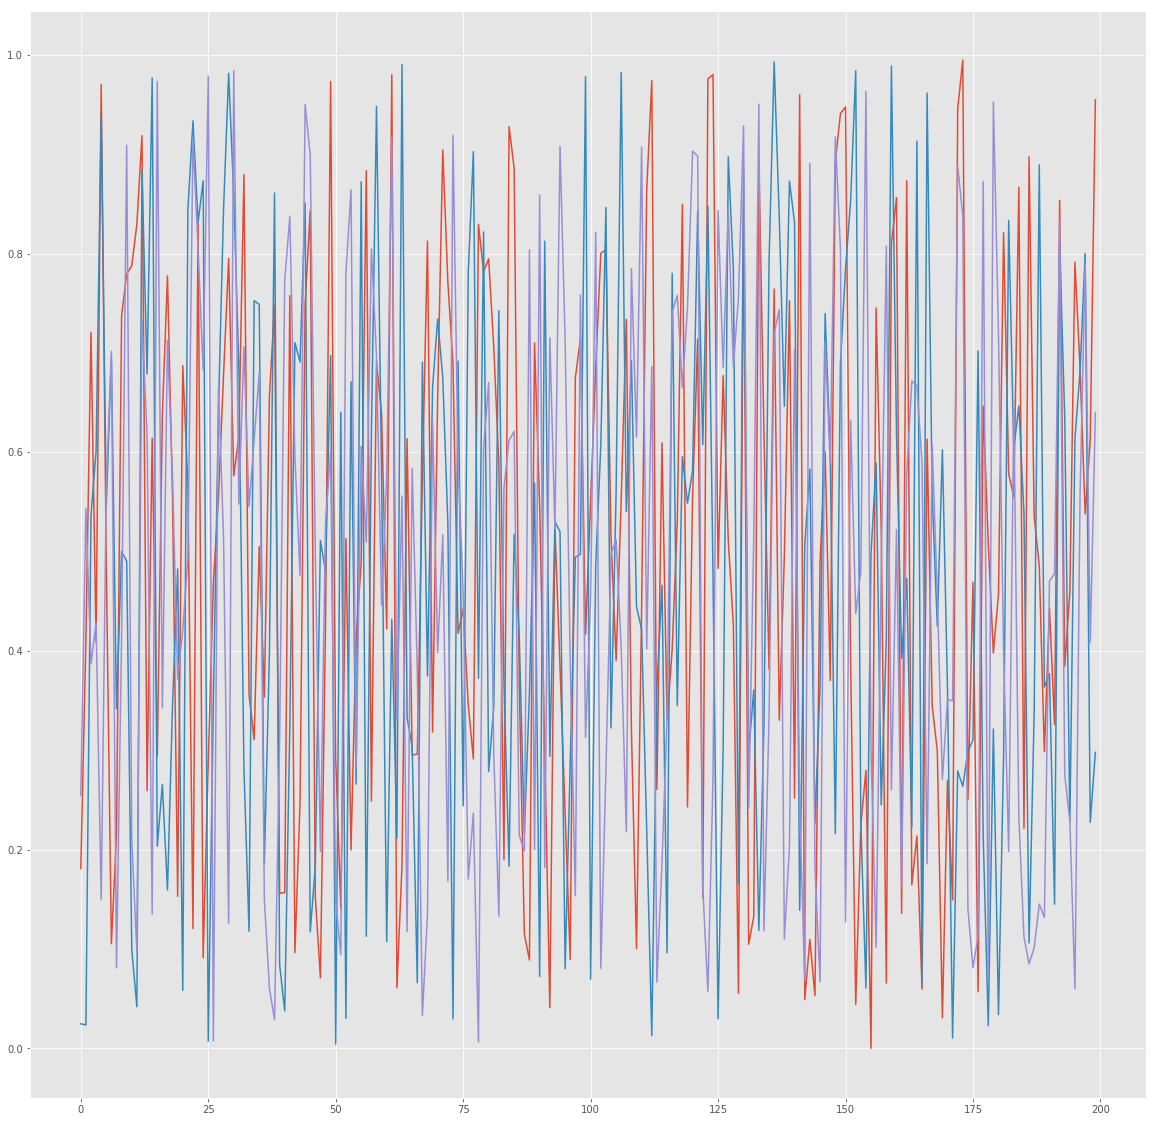

In [221]:
time_points = 200
ix = np.arange(time_points)

temporal_signal1 = np.random.rand(200)
temporal_signal2 = np.random.rand(200)
temporal_signal3 = np.random.rand(200)

num_voxels = 20
spatial_signal1 = np.sin(2*np.pi*ix*(4/num_voxels))
spatial_signal2 = np.sin(2*np.pi*ix*(37/num_voxels))
spatial_signal3 = np.sin(2*np.pi*ix*(17/num_voxels))
# transpose so that columns represent voxels and rows represent timepoints
voxels = np.array([[temporal_signal1]*20,
                   [temporal_signal2]*20,
                   [temporal_signal3]*20])
voxels.shape
plt.plot(voxels[:,1,:].T)

In [222]:
for x in range(20):
    voxels[0,x,:] = voxels[0,x,:] * spatial_signal1[x]
    voxels[1,x,:] = voxels[1,x,:] * spatial_signal1[x]
    voxels[2,x,:] = voxels[2,x,:] * spatial_signal1[x]


In [223]:
dumb_data = np.array([voxels])
dumb_img = nib.Nifti1Image(dumb_data, np.eye(4))
mask_img = nib.Nifti1Image(np.ones(dumb_data.shape[:-1]), np.eye(4))

In [224]:
from nilearn.decomposition import CanICA
can_ica = CanICA(n_components=3, mask=mask_img, n_init=20, random_state=136, do_cca=True)
can_res = can_ica.fit_transform([dumb_img])

/home/james/.conda/envs/seminar/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [225]:
can_res

[array([[-5.11876653e-02, -3.72601015e-01, -5.23745167e-01],
        [-4.88662541e-02, -8.45122538e-01, -1.11752144e+00],
        [-1.10837857e+00, -1.48333973e+00, -7.96372297e-01],
        [-1.24172617e+00, -8.41775964e-01, -8.81682389e-01],
        [-1.94102323e+00, -1.99652377e+00, -3.08572609e-01],
        [-1.12823521e+00, -1.00374161e+00, -1.16387335e+00],
        [-1.43680095e+00, -2.16767746e-01, -1.44324499e+00],
        [-7.06448702e-01, -4.43593799e-01, -1.67148837e-01],
        [-1.03259617e+00, -1.51802636e+00, -8.51494976e-01],
        [-1.01241037e+00, -1.60313440e+00, -1.87005675e+00],
        [-2.05296117e-01, -1.62115219e+00, -4.30279241e-01],
        [-8.66205390e-02, -1.70705556e+00, -1.99375011e-01],
        [-1.82622293e+00, -1.89042299e+00, -1.50647793e+00],
        [-1.40148757e+00, -5.33648935e-01, -1.27035716e+00],
        [-2.01670297e+00, -1.26360903e+00, -2.77927477e-01],
        [-4.20100105e-01, -6.05659376e-01, -2.00233561e+00],
        [-5.48767435e-01

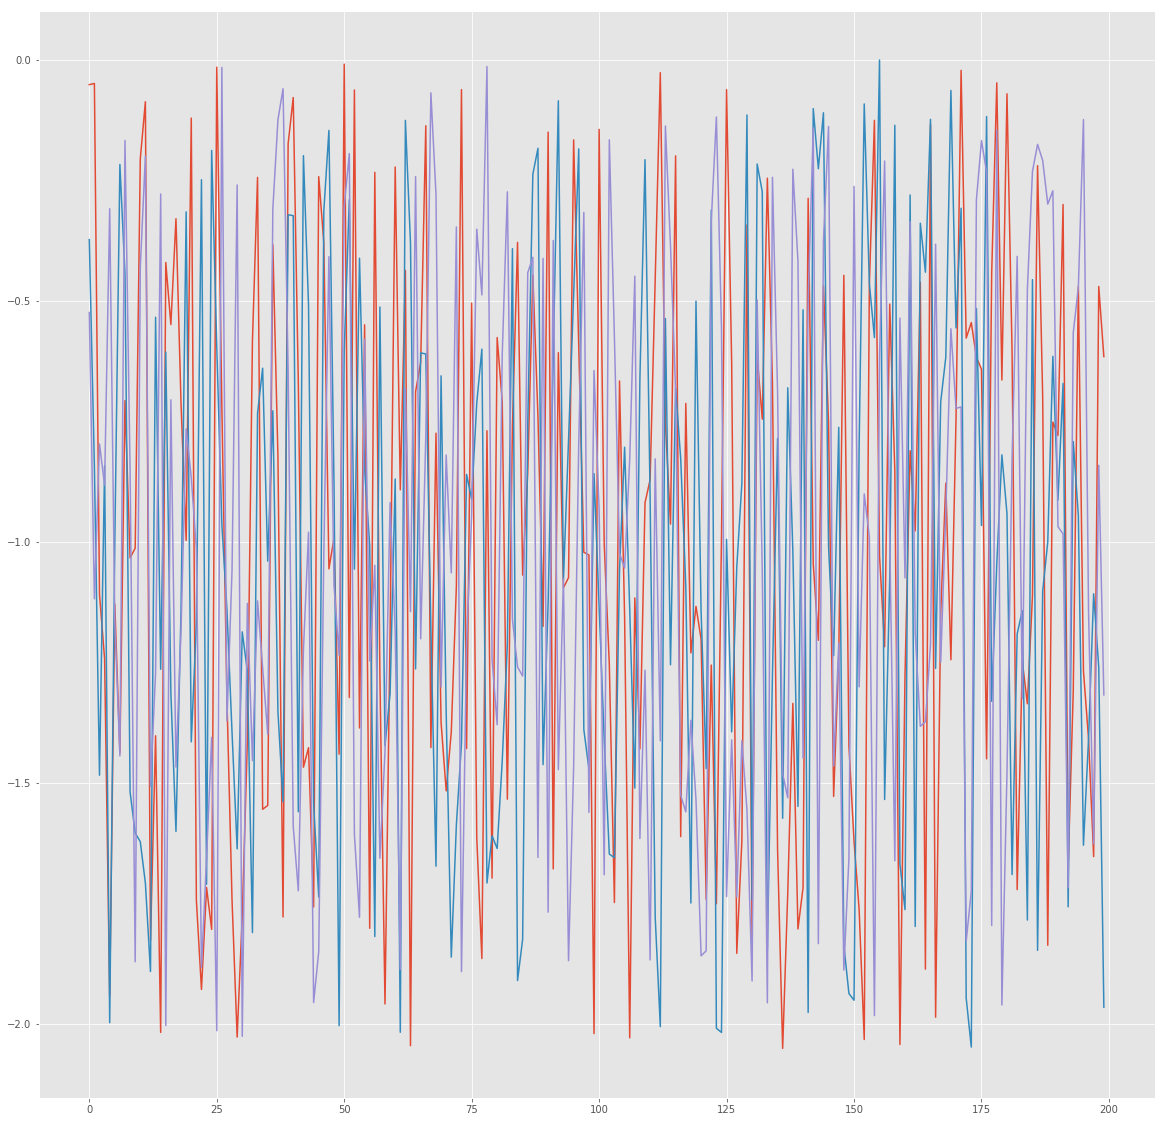

In [226]:
plt.plot(can_res[0])